[@ggruszczynski](https://github.com/ggruszczynski)

12 steps to Navier–Stokes
======
***

### Inspiration

This Jupyter notebook enhances the presentation of the **12 steps to Navier-Stokes**, the practical module taught in the interactive CFD class of [Prof. Lorena Barba](http://lorenabarba.com).

You should have completed [Step 1](./01_Step_1_to_fill.ipynb) and [Step 2](./02_Step_2_to_fill.ipynb) before continuing, having written your own Python script or notebook and having experimented with varying the parameters of the discretization and observing what happens.


Step 2b: Nonlinear Convection - conservative and nonconservative scheme
-----
Now we're going to implement the nonlinear convection equation (aka Burgers' equation) using the same discretization methods as in step 1,2, i.e.: forward difference in time and backward difference in space.

Reminder: that the nonlinearity of convection may lead to the formation of a discontinuity known as **shockwave** (SW)

We will compare the results between non-conservative and conservative scheme.
Observe, that **before discretization** both schemes are mathematicaly **equivalent**.



The 1D convection equation in **non-conservative** form is:


$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$


 Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

---

The 1D convection equation in **conservative** form is:


$$\frac{\partial u}{\partial t} +  \frac{\partial}{\partial x} \left(\frac{u^2}{2} \right) = 0$$

Discretizing:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + \frac{(u_i^n)^2 - (u_{i-1}^n)^2}{2 \Delta x}  = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - \frac{\Delta t}{2 \Delta x} \bigg( (u_i^n)^2 - (u_{i-1}^n)^2 \bigg)$$


As before, the Python code starts by loading the necessary libraries. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

nx = 401
domain_length = 10
dx = domain_length / (nx - 1)
print(f"dx: {dx}")
# xspace = np.linspace(0, domain_length, nx)
xspace=np.linspace(-domain_length/2, domain_length/2, num=nx, endpoint=True)

nt = 1001    #nt is the number of timesteps we want to calculate
t_final = 2.5
dt = t_final / (nt -1)  #dt is the amount of time each timestep covers (delta t)
print(f"dt: {dt}")
tspace=np.linspace(0, t_final, num=nt, endpoint=True)

dx: 0.025
dt: 0.0025


Try different initial conditions

* the 'hat'

* a smooth, tanh function

* gaussian


IC integral: 5.0000


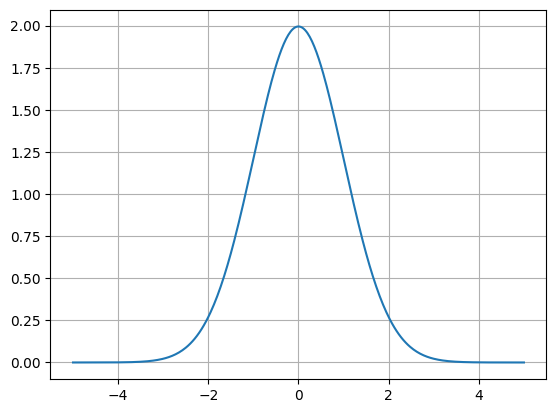

In [2]:
# Try different Initial Conditions


u_IC = np.ones(nx)      #as before, we initialize u with every value equal to 1.
# u_IC[int(.5 / dx) : int(1 / dx + 1)] = 2 #then set u = 2 between 0.5 and 1 as per our I.C.s


# u_IC = -np.tanh(xspace) +1
# u_IC = np.tanh(xspace) +1  # rarefraction wave
# u_IC = -np.tanh(xspace)


gaussian = lambda x, mu, sig :  1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
u_IC = 5* gaussian(xspace, mu = 0., sig = 1.0)

plt.plot(xspace, u_IC)
plt.grid()

xspace
u_IC.shape
print(f"IC integral: {np.trapz(u_IC, x=None, dx=dx, axis=-1):.4f}")

In [3]:
def make_sw_plot(x, u_nonconserv, u_conserv):
  plt.clf() # Used to clear the current Figure’s state without closing it.
  plt.close()
  fig = mpl.pyplot.gcf()
  fig.set_size_inches(8,6)
  ax = plt.gca()
  ax.plot(x, u_IC, linestyle="-", color="green", label='x_{IC}')
  ax.set(xlabel='time', ylabel=r'$x_{IC}$')
  ax.set_title(r'$u(t)$')
  ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
  ax.plot(x, u_nonconserv, linestyle="-", color="red", label='u_{non-conservative}')
  ax.plot(x, u_conserv, linestyle="-", color="blue", label='u_{conservative}')
  ax.legend([r"$u_{IC}$", r"$u_{non-conservative}$", r"$u_{conservative}$"],loc="upper right")  #
  plt.grid()
  plt.show()


In [4]:
def nonlinear_advection_nonconservative(u, nt, nx):
  for n in range(nt):  #iterate through time
      un = u.copy()    ##copy the existing values of u into un
      c_ind = np.arange(0, nx)     # un[i]
      r_ind = np.roll(c_ind, 1)   # un[i-1]
      beta = un * dt / dx
      u = un - beta* (un[c_ind] - un[r_ind])
  return u

def nonlinear_advection_conservative(u, nt, nx):
  for n in range(nt):
      un = u.copy()
      c_ind = np.arange(0, nx)
      r_ind = np.roll(c_ind, 1)
      beta = dt / (2*dx)
      u = un - beta* (un[c_ind]**2  - un[r_ind]**2 )
  return u

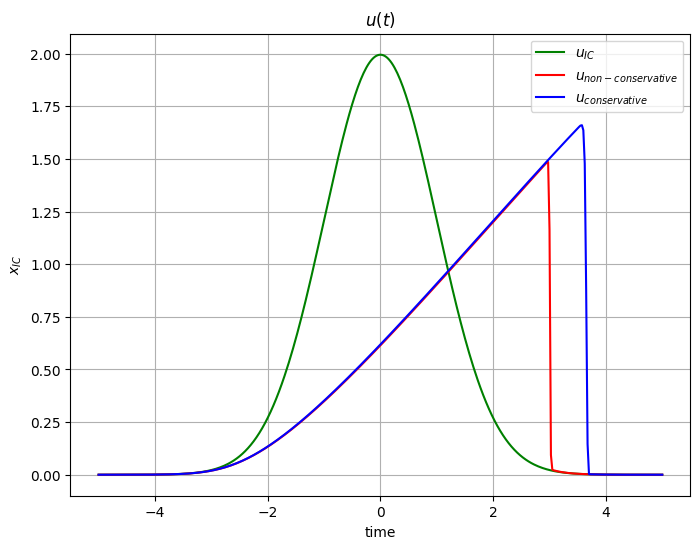

In [5]:
u = u_IC.copy()      #initialize our placeholder array un, to hold the time-stepped solution

u_noncon = nonlinear_advection_nonconservative(u, nt, nx)
u_con = nonlinear_advection_conservative(u, nt, nx)

make_sw_plot(xspace, u_noncon, u_con)

In [6]:
print(f"IC integral: {np.trapz(u_IC, x=None, dx=dx, axis=-1):.4f}")
print(f"u_non-conservative integral: {np.trapz(u_noncon, x=None, dx=dx, axis=-1):.4f}")
print(f"u_conservative integral: {np.trapz(u_con, x=None, dx=dx, axis=-1):.4f}")

IC integral: 5.0000
u_non-conservative integral: 3.9621
u_conservative integral: 5.0000


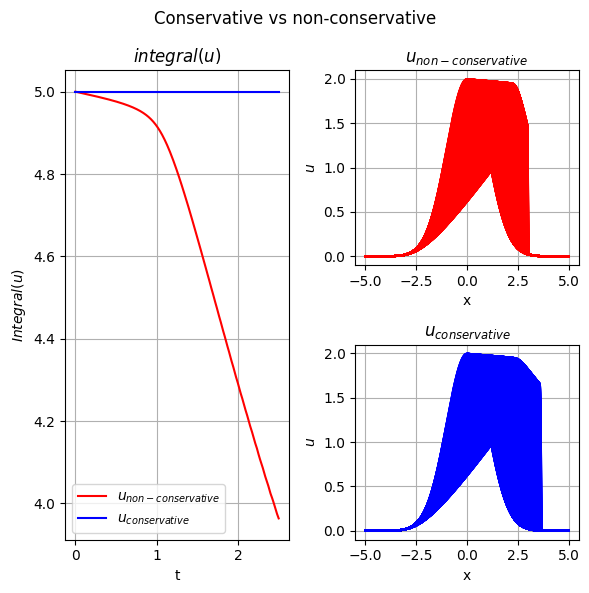

In [7]:
plt.clf() # Used to clear the current Figure’s state without closing it.
plt.close()
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))
# fig = mpl.pyplot.gcf()

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(222)
ax2 = plt.subplot(224)
ax3 = plt.subplot(121)

fig.suptitle('Conservative vs non-conservative')
ax1.grid(which='both')
ax1.set(xlabel='x', ylabel=r"$u$")
ax1.set_title(r'$u_{non-conservative}$')

ax2.grid(which='both')
ax2.set(xlabel='x', ylabel=r"$u$")
ax2.set_title(r'$u_{conservative}$')

u_noncon = u_IC.copy() #initialize our placeholder array un, to hold the time-stepped solution
u_con = u_IC.copy()

sum_u_con = np.zeros(nt)
sum_u_noncon = np.zeros(nt)


for n in range(nt):  #iterate through time
    un_noncon = u_noncon.copy()    #copy the existing values of u into un
    un_con = u_con.copy()

    sum_u_con[n] = np.trapz(u_con, x=None, dx=dx, axis=-1)
    sum_u_noncon[n] = np.trapz(u_noncon, x=None, dx=dx, axis=-1)

    ax1.plot(xspace, u_noncon, linestyle="-", color="red")
    ax2.plot(xspace, u_con, linestyle="-", color="blue")

    for i in range(0, nx):  ##now we'll iterate through the u array  # range(1, nx) - fix left BC
    ###This is the line from Step 1, copied exactly.  Edit it for our new equation.
    ###then uncomment it and run the cell to evaluate Step 2
        # u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])    # constant advection coeff
        u_noncon[i] = un_noncon[i] - un_noncon[i]* dt / dx * (un_noncon[i] - un_noncon[i-1])  # noncoservative
        u_con[i] = un_con[i] -  dt / (2*dx) * (un_con[i]**2 - un_con[i-1]**2)  # conservative


ax3.plot(tspace, sum_u_noncon, linestyle="-", color="red")
ax3.plot(tspace, sum_u_con, linestyle="-", color="blue")
ax3.grid(which='both')
ax3.set(xlabel='t', ylabel=r"$Integral(u)$")
ax3.legend([r"$u_{non-conservative}$", r"$u_{conservative}$"],loc="lower left")
ax3.set_title(r'$integral(u)$')

plt.tight_layout()
plt.show()

# Conclusions

* the non-conservative form generates discontinouties at wrong location.
* the non-conservative form looses the total amount of $u$. The loosing increased once the SW (discontinuity) is formed.